# Conhecendo LinearSVC (Linear Support Vector Classification)

Esta aplicação é uma continuação da aplicação no link abaixo:

https://github.com/leandrocl2005/geometria-analitica-aplicada-exemplos/blob/main/classificador_linearSVC_em_R2.ipynb

No link acima aprendemos a traçar uma reta que divide o plano cartesiano em duas regiões de forma que cada região represente uma classe distinta da amostra.

Faremos a mesma coisa, porém dessa vez, utilizaremos um **plano** para separar o **espaço cartesiano** em duas regiões de forma que cada região represente uma classe distinta da amostra.


# Passo 1: Carregar os dados

In [2]:
import pandas as pd

# escolhi os dados das flores da espécie iris
dados = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/bezdekIris.data', header=None)
dados.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# veja as 3 primeiras linhas
dados.head(3)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


É interessante sabermos algumas estatísticas sobre os dados para construção de melhores visualizações

In [10]:
dados.describe()

,sepal_length,sepal_width,petal_length
count,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000
std,0.641698,0.478739,1.449549
min,4.300000,2.000000,1.000000
25%,5.000000,2.800000,1.500000
50%,5.400000,3.050000,2.450000
75%,5.900000,3.400000,4.325000
max,7.000000,4.400000,5.100000


## Passo 2: Escolha três colunas numéricas e uma categórica 

In [4]:
# sepal_length e sepal_width são numéricas, class é categórica
dados = dados[['sepal_length', 'sepal_width', 'petal_length', 'class']]

## Passo 3: Filtre os dados para ficar com apenas duas categorias

In [5]:
# ficaremos apenas com iris-setosa e iris-versicolor
dados = dados[dados['class'] != 'Iris-virginica']

## Passo 4: Ilustre sua escolha com um gráfico

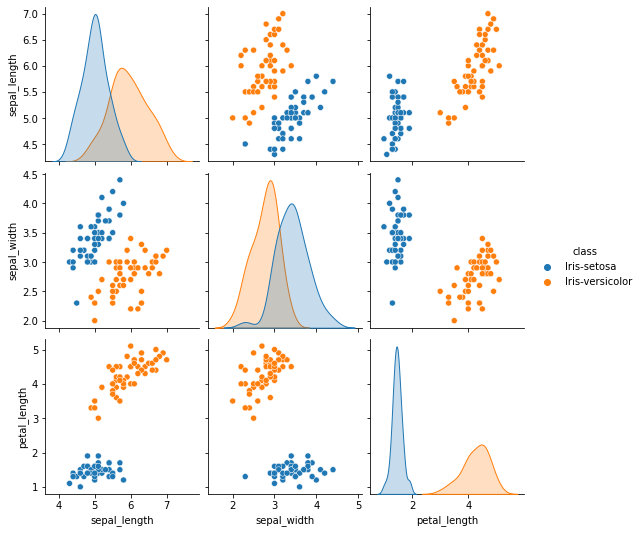

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(
    data=dados, 
    hue="class")
plt.show()

## Passo 5: Use o LinearSVC para encontrar os coeficientes do plano

In [7]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(dados.drop('class', axis=1), dados['class'])

a, b, c = model.coef_[0]
d = model.intercept_[0]

print('a:', a)
print('b:', b)
print('c:', c)
print('d:', d)

a: -0.1618551898622422
b: -0.5307245077218611
c: 0.9759185964706959
d: -0.1133540447066863


## Passo 6: Desenhe o plano


Os coeficientes acima dizem que o plano tem equação

$$ax + by + cz + d = 0$$

ou

$$ z = -\frac{a}{c} x - \frac{b}{c}y - \frac{d}{c}$$

In [8]:
def z(x,y):
  return -a/c * x -b/c * y - d / c

Agora podemos fazer o gráfico do plano:

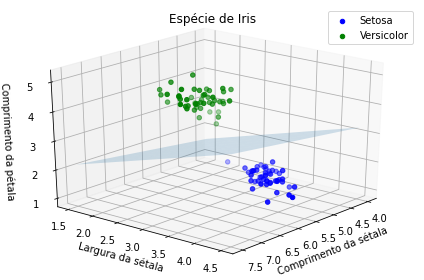

In [37]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np


from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure() # janela
ax = fig.gca(projection='3d') # eixos 3D

X = np.arange(4, 8, 0.5) # X variando de 4 a 8 de 0.5 em 0.5
Y = np.arange(1.5, 5, 0.5) # Y variando de 1.5 a 5 de 0.5 em 0.5
X, Y = np.meshgrid(X, Y) # criando a grade de pontos
Z = -a/c * X -b/c * Y - d / c # calculando Z

# alpha é a transparência da superfície
surf = ax.plot_surface(X, Y, Z, alpha=0.2) # gráfico de superfície

ax.set_xlabel('Comprimento da sétala') # rótulo do eixo x
ax.set_ylabel('Largura da sétala') # rótulo do eixo y
ax.set_zlabel('Comprimento da pétala') # rótulo do eixo z
ax.set_title('Espécie de Iris') # título

setosas = dados[dados['class']=='Iris-setosa']
ax.scatter(
    setosas['sepal_length'], 
    setosas['sepal_width'], 
    setosas['petal_length'],
    label="Setosa",
    zdir='z', 
    color='b') # gráfico de dispersão das setosas

versicolors = dados[dados['class']=='Iris-versicolor']
ax.scatter(
    versicolors['sepal_length'], 
    versicolors['sepal_width'], 
    versicolors['petal_length'], 
    label="Versicolor",
    zdir='z', 
    color='g') # gráfico de dispersão das versicolors

ax.view_init(25,40) # ângulos para apresentação do gráfico
plt.legend() # mostra legenda
plt.tight_layout() # ajustando a janela

plt.show() # mostra o gráfico

## Passo 7: Exiba os erros através da matriz de confusão

[[50  0]
 [ 0 50]]


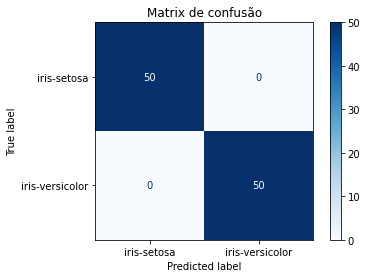

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(
    model,
    dados.drop('class', axis=1),
    dados['class'],
    display_labels=['iris-setosa', 'iris-versicolor'],
    cmap=plt.cm.Blues,
)
disp.ax_.set_title("Matrix de confusão")
print(disp.confusion_matrix)

A matriz acima diz que nenhuma amostra foi classificada incorretamente! Como os dados desse exemplo estavam geometricamente bem separados e o modelo SVC é um bom modelo, este resultado era esperado.

## Passo 8: Escreva explicitamente a função que define o seu classificador

In [54]:
def iris_setosa_ou_versicolor(sepal_length, sepal_width, petal_length):
  if a * sepal_length + b * sepal_width + c * petal_length + d >= 0:
    return 'iris-versicolor'
  else:
    return 'iris-setosa'

# Podemos agora classificar novas espécies de acordo com nosso modelo
print(iris_setosa_ou_versicolor(6,4,3))
print(iris_setosa_ou_versicolor(2,1,2))
print(iris_setosa_ou_versicolor(4,3,2))

iris-setosa
iris-versicolor
iris-setosa


## Passo 9: Faça um gráfico mostrando onde estão os novos pontos classificados

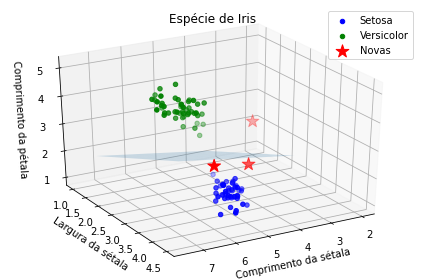

In [53]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np


from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure() # janela
ax = fig.gca(projection='3d') # eixos 3D

X = np.arange(4, 8, 0.5) # X variando de 4 a 8 de 0.5 em 0.5
Y = np.arange(1.5, 5, 0.5) # Y variando de 1.5 a 5 de 0.5 em 0.5
X, Y = np.meshgrid(X, Y) # criando a grade de pontos
Z = -a/c * X -b/c * Y - d / c # calculando Z

# alpha é a transparência da superfície
surf = ax.plot_surface(X, Y, Z, alpha=0.2) # gráfico de superfície

ax.set_xlabel('Comprimento da sétala') # rótulo do eixo x
ax.set_ylabel('Largura da sétala') # rótulo do eixo y
ax.set_zlabel('Comprimento da pétala') # rótulo do eixo z
ax.set_title('Espécie de Iris') # título

setosas = dados[dados['class']=='Iris-setosa']
ax.scatter(
    setosas['sepal_length'], 
    setosas['sepal_width'], 
    setosas['petal_length'],
    label="Setosa",
    zdir='z', 
    color='b') # gráfico de dispersão das setosas

versicolors = dados[dados['class']=='Iris-versicolor']
ax.scatter(
    versicolors['sepal_length'], 
    versicolors['sepal_width'], 
    versicolors['petal_length'], 
    label="Versicolor",
    zdir='z', 
    color='g') # gráfico de dispersão das versicolors

# mostrando as novas amostras no gráfico
ax.scatter(
    [6,2,4],[4,1,3],[3,2,2], 
    color='red', s=180, marker='*', label="Novas") 

ax.view_init(30,60) # ângulos para apresentação do gráfico
plt.legend() # mostra legenda
plt.tight_layout() # ajustando a janela

plt.show() # mostra o gráfico